In [1]:
import numpy as np
import pandas as pd

# cross validation purposes: create the cartesian product between the chosen values sets
from itertools import product 

import matplotlib.pyplot as plt
%matplotlib inline

#import os
#import seaborn

# Read Dataset

In [2]:
cmp = pd.read_csv("commViolUnnormData.txt", na_values='?')

In [3]:
# drop first non predictive features (communityname, state, countyCode, communityCode, "fold")
pred_features = cmp[cmp.columns[5:-18]]
regr_values = cmp[cmp.columns[-18:]]

# Drop features with a lot of missing values

In [4]:
print("Before dropping: {} features".format(str(pred_features.shape[1])))

#drop features that contain at least some threshold (from the total) of NaN values
cut_tresh = 0.75
to_drop = pred_features.columns[pred_features.count() < pred_features.shape[0]*cut_tresh]

pred_features = pred_features.drop(columns=to_drop)

print("After dropping: {} features".format(str(pred_features.shape[1])))

Before dropping: 124 features
After dropping: 102 features


# Imputing on features matrix

In [5]:
from collections import Counter

def value_withStrategy(v, strat):
    if strat == "mean":
        return np.mean(v)
    if strat == "median":
        return np.median(v)
    if strat == "most_frequent":
        return Counter(v).most_common(1)[0][0]
    print("Invalid imputing strategy!")
        
def imputing(df, strategy):
    # for each column that contain at least 1 NaN value...
    for nanCol in np.unique(np.where(pred_features.isna())[1]):
        nanRows = np.where(pred_features.iloc[:,nanCol].isna())[0] #find NaN rows for the current column
        available = df.iloc[~nanRows, nanCol]
        value = value_withStrategy(available, strategy) #compute the filling value
        df.iloc[nanRows, nanCol] = value

In [6]:
imputing(pred_features, "mean");

# Outliers Detection

-- TBD <br>
A thourough study from scratch of outliers detection is needed here, but for now it feels like it exceeds the course final project.

# Choose the Dependent Variable and drop possible missing values rows on it

In [12]:
print(regr_values.columns)

Index(['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies',
       'robbPerPop', 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop',
       'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons',
       'arsonsPerPop', 'ViolentCrimesPerPop', 'nonViolPerPop'],
      dtype='object')


In [8]:
regr_values.describe()

,murders,murdPerPop,rapes,rapesPerPop,robberies,robbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
count,2215.000000,2215.000000,2007.000000,2007.00000,2214.000000,2214.000000,2202.000000,2202.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2124.000000,2124.000000,1994.000000,2118.000000
mean,7.764786,5.859296,28.046338,36.25848,237.952123,162.612597,326.528156,378.004605,761.236890,1033.430203,2137.629295,3372.979150,516.692586,473.965628,30.907721,32.153682,589.078922,4908.241804
std,58.166468,9.156829,105.616135,34.23975,2250.720788,234.486624,1987.947941,438.238599,3111.702756,763.354442,7600.573464,1901.316145,3258.164244,504.666026,180.125248,39.240900,614.784518,2739.708901
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000
25%,0.000000,0.000000,2.000000,11.53500,5.000000,27.647500,18.000000,94.187500,95.000000,511.690000,392.000000,2040.080000,30.000000,156.952500,1.000000,7.670000,161.700000,2918.070000
50%,1.000000,2.170000,7.000000,26.92000,19.000000,74.800000,56.000000,226.525000,205.000000,822.715000,747.000000,3079.510000,75.000000,302.355000,5.000000,21.080000,374.060000,4425.450000
75%,3.000000,8.365000,19.000000,51.47000,70.000000,187.155000,180.000000,504.387500,508.000000,1350.232500,1675.000000,4335.410000,232.500000,589.775000,16.000000,42.852500,794.400000,6229.280000
max,1946.000000,91.090000,2818.000000,401.35000,86001.000000,2264.130000,62778.000000,4932.500000,99207.000000,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000


In [13]:
def drop_naSample(df, vals):
    idxRow = np.where(vals.isna())[0]
    return df.drop(index=idxRow).values, vals.drop(index=idxRow).values.reshape(-1,1)

In [14]:
dep_var = "nonViolPerPop"
data,values = drop_naSample(pred_features, regr_values[dep_var])

# Exploratory Data Analysis

In [15]:
regr_values[dep_var].describe()

count     2118.000000
mean      4908.241804
std       2739.708901
min        116.790000
25%       2918.070000
50%       4425.450000
75%       6229.280000
max      27119.760000
Name: nonViolPerPop, dtype: float64

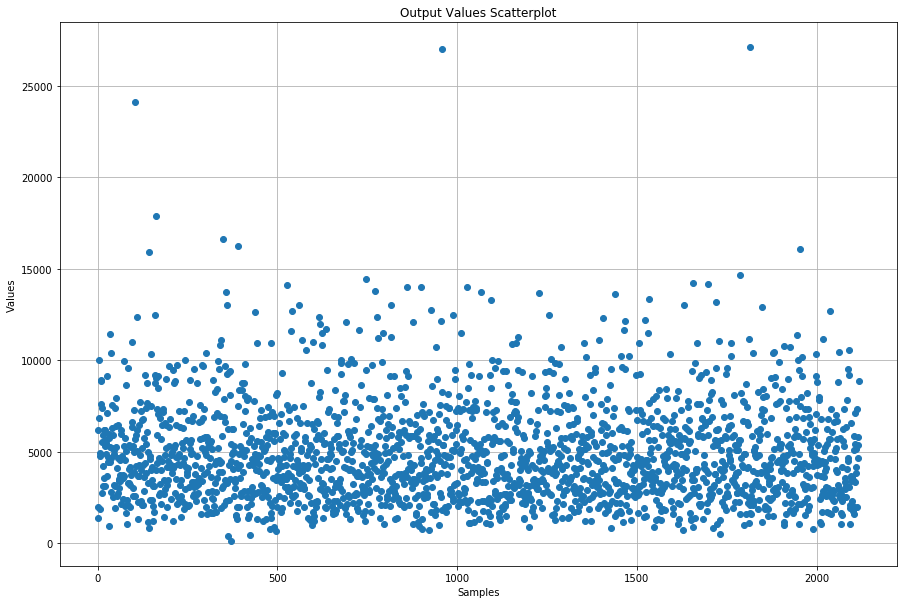

In [16]:
plt.figure(figsize=(15,10))
plt.plot(values, 'o')
plt.title("Output Values Scatterplot")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.grid()

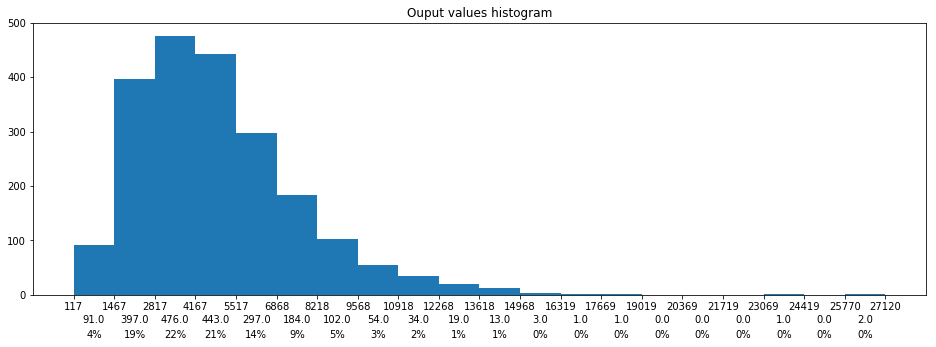

In [17]:
plt.figure(figsize=(16,5))
counts,bins,_ = plt.hist(values,bins=20)

bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    plt.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -20), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    plt.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -35), textcoords='offset points', va='top', ha='center')
    
plt.title("Ouput values histogram")
plt.xticks(bins)
plt.show()

In [18]:
def sample_pearsonCorrelation_withOutput(X, y):
    # r_x_y = cov(x,y)/(stdev(x)*stdev(y))
    _,d = X.shape
    corr = np.empty((d,1))
    
    y_centered = y-np.mean(y)
    y_stdev = np.std(y)
    
    for i in range(d):
        current = X[:,i]
        corr[i] = np.mean(np.multiply(current-np.mean(current), y_centered))/(np.std(current)*y_stdev)
        
    return corr

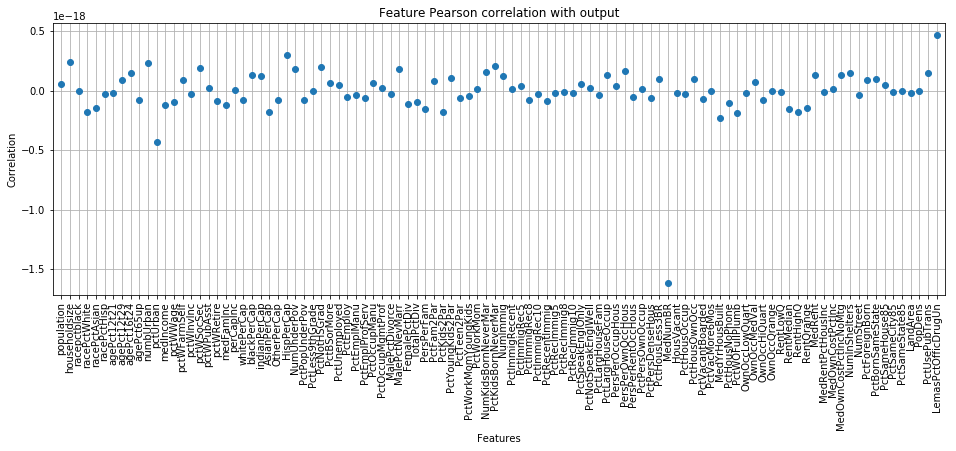

In [19]:
p_corr = sample_pearsonCorrelation_withOutput(data, values)

plt.figure(figsize=(16,5))
plt.plot(p_corr, "o")
plt.title("Feature Pearson correlation with output")
plt.xticks(range(len(pred_features.columns)), pred_features.columns, rotation=90)
plt.xlabel("Features")
plt.xlim(-1,102)
plt.ylabel("Correlation")
plt.grid()

# Normalisation

In [20]:
def normalise(matrix, strat):
    for j in range(matrix.shape[1]):
        mi = np.min(matrix[:,j])
        ma = np.max(matrix[:,j])
        di = ma-mi
        if (di > 1e-6):
            if strat=="0_mean,1_std":
                matrix[:,j] = (matrix[:,j]-np.mean(matrix[:,j]))/np.std(matrix[:,j])
            elif strat=="[0,1]":
                matrix[:,j] = (matrix[:,j]-mi)/di
            elif strat=="[-1,1]":
                matrix[:,j] = 2*((matrix[:,j]-mi)/di)-1
            else:
                print("Invalid normalisation strategy!")
        else:
            matrix[:,j] = 0

In [21]:
strategy = "[-1,1]"
normalise(data,strategy)
normalise(values,strategy)

# Train-Test Split

In [22]:
def trainTest_split(in_matrix, out_vect, train_amount=0.7):
    n,_ = in_matrix.shape

    trVl_Amount = int(n*train_amount) #training-validation amount
    indexes = np.random.permutation(n)
    idxTrVl = np.sort(indexes[0:trVl_Amount])
    idxTs = np.sort(indexes[trVl_Amount:])

    return in_matrix[idxTrVl], in_matrix[idxTs], out_vect[idxTrVl], out_vect[idxTs]

In [23]:
trainVal_data, test_data, trainVal_values, test_values = trainTest_split(data, values, train_amount=0.7)

# Evaluation Metrics

In [24]:
class Regression_evaluationMetric:
    def __init__(self, true, predicted):
        self.true = true.flatten()
        self.predicted = predicted.flatten()
        self.residuals = self.true-self.predicted
    
    def meanSquareError(self):
        return np.mean(np.square(self.residuals))
    
    def rootMeanSquareError(self):
        return np.sqrt(np.mean(np.square(self.residuals)))
    
    def meanAbsoluteError(self):
        return np.mean(np.abs(self.residuals))
    
    def rSquared(self):
        ss_residual = np.sum(np.square(self.residuals))
        ss_total = np.sum(np.square(self.true-np.mean(self.true)))        
        return 1 - ss_residual/ss_total
    
    def adjusted_rSquared(self, p):
        n = self.true.shape[0]
        return 1-(1-self.rSquared())*((n-1)/(n-p-1))


# Variable Selection - Models Definition

## 0. K-fold Cross Validation

In [25]:
from itertools import product

def kFold_crossValidation_selectionGrid(k, parameters_dict, train_data, train_values, predictor, verbose=False):
    nVal,_ = train_data.shape
    
    # Validation indexes adjustment -------------------------------
    elemPerFold, remainder = np.divmod(nVal,k) #the remainder will be distributed across the firsts folds
    valIdxList = []
    start = 0

    # in each fold put as many samples as the division quotient +1 if the remainder is still positive
    # then decrease the division remainder by 1
    for i in range(k): 
        end = start+elemPerFold+int(remainder>0)
        valIdxList.append(np.arange(start,end)) 
        remainder -= 1
        start = end
    
    # Cross validation --------------------------------------------
    params_names = parameters_dict.keys()
    params_product = list(product(*parameters_dict.values())) # build all the hyp-par combination
    val_results = np.empty((len(valIdxList),len(params_product)))
    
    for row, valIdx in enumerate(valIdxList): # for each fold
        if verbose: print("#{} fold:".format(row+1))
        for col, params in enumerate(params_product):
            
            if verbose:
                update = col*100/len(params_product) # just print completion rate
                print("\t["+"#"*(int(update/5))+" "*(int((100-update)/5))+"] {}%".format(update))
                     
            arg_dict = {k:v for k,v in zip(params_names,params)} # {argument_name:argument_value, ... }
            
            
            predictor.fit(train_data[~valIdx], train_values[~valIdx], **arg_dict)
            pred = predictor.predict(train_data[valIdx])
            
            rem = Regression_evaluationMetric(trainVal_values[valIdx], pred)
            #val_results[row,col] = rem.rSquared()
            val_results[row,col] = rem.rootMeanSquareError()
            
    selected = np.argmin(val_results.mean(axis=0))
    return params_product[selected]

## 1. Matching Pursuit - Not Working (use the sklearn model)

### Project class definition

In [26]:
class matchingPursuit:
    def __init__(self, iterations, weights = None, indexes = None):
        self.iterations = iterations
        self.weights = weights
        self.indexes = indexes
        
    def fit(self, data_matrix, output_vect):
        residual = output_vect.copy()
        self.weights = np.zeros((data_matrix.shape[1], 1))
        self.indexes = []

        #data_2norm = np.sqrt(np.sum(np.square(data_matrix), axis=0))
        data_2norm = np.linalg.norm(data_matrix, ord=2, axis=0).reshape(1,-1)

        for i in range(self.iterations):
            
            # project each column on the current residuals
            projection = np.matmul(residual.T, data_matrix)
            # find the most correlated variable: the one that in norm maximise the projections
            k = np.argmax(np.divide(np.square(projection), data_2norm))
            self.indexes.append(k)
            
            distance = projection[0,k]/np.linalg.norm(data_matrix[:,k], ord=2)
            self.weights[k,0] += distance # update the solution vector: canonical basis over the found column
            residual -= np.matmul(data_matrix, self.weights) # update the residual

        return self
    
    
    def predict(self, X):
        if self.weights is None:
            raise Exception("weights not initialised! need to first fit the model")
        return np.matmul(X, self.weights)
    
    
    def sort_featureImportances(self, columns=None, num=0):
        if self.weights is None:
            raise Exception("Need to first fit the model!")
            
        d = len(self.weights)
        n_printFeat = d if not num else num
        
        if columns is None:
            return sorted(zip(range(d),self.weights), key=lambda kv: abs(kv[1]), reverse=True)[:n_printFeat]

        if len(columns) != d:
            raise Exception("Argument list lenght differs from feature total amount")
        return sorted(zip(columns, self.weights), key=lambda kv: abs(kv[1]), reverse=True)[:n_printFeat]

In [27]:
mp = matchingPursuit(iterations=10)
mp.fit(trainVal_data, trainVal_values)
mp.sort_featureImportances(columns=pred_features.columns)

[('NumStreet', array([-2.80364486e+15])),
 ('population', array([0.])),
 ('householdsize', array([0.])),
 ('racepctblack', array([0.])),
 ('racePctWhite', array([0.])),
 ('racePctAsian', array([0.])),
 ('racePctHisp', array([0.])),
 ('agePct12t21', array([0.])),
 ('agePct12t29', array([0.])),
 ('agePct16t24', array([0.])),
 ('agePct65up', array([0.])),
 ('numbUrban', array([0.])),
 ('pctUrban', array([0.])),
 ('medIncome', array([0.])),
 ('pctWWage', array([0.])),
 ('pctWFarmSelf', array([0.])),
 ('pctWInvInc', array([0.])),
 ('pctWSocSec', array([0.])),
 ('pctWPubAsst', array([0.])),
 ('pctWRetire', array([0.])),
 ('medFamInc', array([0.])),
 ('perCapInc', array([0.])),
 ('whitePerCap', array([0.])),
 ('blackPerCap', array([0.])),
 ('indianPerCap', array([0.])),
 ('AsianPerCap', array([0.])),
 ('OtherPerCap', array([0.])),
 ('HispPerCap', array([0.])),
 ('NumUnderPov', array([0.])),
 ('PctPopUnderPov', array([0.])),
 ('PctLess9thGrade', array([0.])),
 ('PctNotHSGrad', array([0.])),
 (

In [28]:
pred = mp.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 5.486815368111316e+28
Root Mean Square Error: 2795586803885630.0
R^2 score: -1.6652783810612477e+32


### SkLearn Class

In [29]:
from sklearn.linear_model import orthogonal_mp
omp_coef = orthogonal_mp(trainVal_data, trainVal_values)
np.where(omp_coef)[0]

array([11, 34, 37, 38, 44, 55, 60, 76, 89, 92])

In [30]:
pred = np.matmul(test_data, omp_coef)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.07133408990167683
Root Mean Square Error: 0.16445016783886562
R^2 score: 0.42375187864113717


## 2. L1 Penalty (Lasso) with Proximal Gradient - Not Working (use the sklearn model)

### Project class definition

In [31]:
class lasso_regression: # Iterative Soft Thresholding Algorithm
    def __init__(self, iterations, weights=None):
        self.iterations = iterations
        self.weights = weights
        
    def fit(self, data_matrix, output_vect, _lambda):
        n,d = data_matrix.shape
        self.weights = np.zeros((d,1))
        
        # convergence step-size: n/(2*||X^t*X||_2)
        step = n/(2*np.linalg.norm(np.matmul(data_matrix.T, data_matrix), ord=2))
        softTresh = step*_lambda

        for i in range(self.iterations):
            # gradient step of the mse formulation
            resid = np.matmul(data_matrix, self.weights) - output_vect
            grad_descent = (step/n)*np.matmul(data_matrix.T, resid)
            self.weights -= 2*grad_descent

            # proximal operator
            upper = self.weights > softTresh  # elem to be reduced
            lower = self.weights < -softTresh # elem to be increased
            self.weights[upper] -= softTresh
            self.weights[lower] += softTresh
            self.weights[~upper & ~lower] = 0

        return self
    
    def predict(self, X):
        if self.weights is None:
            raise Exception("weights not initialised! need to first fit the model")
        return np.matmul(X, self.weights)
    
    def sort_featureImportances(self, columns=None, num=0):
        if self.weights is None:
            raise Exception("Need to first fit the model!")
            
        d = len(self.weights)
        n_printFeat = d if not num else num
        
        if columns is None:
            return sorted(zip(range(d),self.weights), key=lambda kv: abs(kv[1]), reverse=True)[:n_printFeat]

        if len(columns) != d:
            raise Exception("Argument list lenght differs from feature total amount")
        return sorted(zip(columns, self.weights), key=lambda kv: abs(kv[1]), reverse=True)[:n_printFeat]

In [32]:
lr = lasso_regression(iterations=1000)
lr.fit(trainVal_data, trainVal_values, 0.5)
lr.sort_featureImportances(columns=pred_features.columns)

[('NumStreet', array([0.07461327])),
 ('NumInShelters', array([0.06935664])),
 ('NumKidsBornNeverMar', array([0.06355184])),
 ('NumImmig', array([0.05751336])),
 ('NumUnderPov', array([0.05142374])),
 ('population', array([0.0381238])),
 ('numbUrban', array([0.02982459])),
 ('HousVacant', array([0.01752796])),
 ('householdsize', array([0.])),
 ('racepctblack', array([0.])),
 ('racePctWhite', array([0.])),
 ('racePctAsian', array([0.])),
 ('racePctHisp', array([0.])),
 ('agePct12t21', array([0.])),
 ('agePct12t29', array([0.])),
 ('agePct16t24', array([0.])),
 ('agePct65up', array([0.])),
 ('pctUrban', array([0.])),
 ('medIncome', array([0.])),
 ('pctWWage', array([0.])),
 ('pctWFarmSelf', array([0.])),
 ('pctWInvInc', array([0.])),
 ('pctWSocSec', array([0.])),
 ('pctWPubAsst', array([0.])),
 ('pctWRetire', array([0.])),
 ('medFamInc', array([0.])),
 ('perCapInc', array([0.])),
 ('whitePerCap', array([0.])),
 ('blackPerCap', array([0.])),
 ('indianPerCap', array([0.])),
 ('AsianPerCap'

In [33]:
pred = lr.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.04683750379420932
Root Mean Square Error: 0.3197503021433651
R^2 score: -1.1785263010567038


### SkLearn Class

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.005)
lasso.fit(trainVal_data, trainVal_values)
np.where(lasso.coef_)[0]

array([11, 28, 34, 38, 40, 44, 55, 70, 76, 77, 85, 94])

In [35]:
pred = lasso.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.06278192711012595
Root Mean Square Error: 0.1635044025430267
R^2 score: 0.4303609119685199


## 3. Random Forest

### Project Decision Tree class definition

In [36]:
class NumericalDecisionTree_regressor: # Least Square Regression Tree with either fixed parameter or pruning
    class Node:
        def __init__(self, isLeaf=False, feature=None, feature_importance=None, cut=None, average=None,
                     left=None, right=None):
            self.isLeaf = isLeaf
            self.feature = feature # if internal, on wich feature it executes the split
            self.feature_importance = feature_importance # solution variance reduction
            self.cut = cut # if internal, threahold value for the cut
            self.avg = average # mean of seen training values
            self.left = left
            self.right = right

        def print_tree(self):
            if self.left: self.left.print_tree()
            if self.cut:
                print("Feature: {}, cut: {}\n".format(self.feature, self.cut))
            else:
                print("Leaf => {}\n".format(self.avg))
            if self.right: self.right.print_tree()

        def print_tree_indented(self, level=0):
            if self.right: self.right.print_tree_indented(level+1)
            if self.cut:
                print("|    "*level+"{} => {}".format(self.feature, self.cut))
            else:
                print("|    "*level+"Leaf: {}".format(self.avg))                
            if self.left: self.left.print_tree_indented(level+1)
            
    def __init__(self, root=None, feature_importances=None):
        self.root = root
        self.feature_importances = feature_importances

        
    def fit(self, X, y, depth, minElems_perLeaf, post_pruning=False):
        
        self.feature_importances = {k:0 for k in range(X.shape[1])}
        
        if not post_pruning:
            self.root = self.learn(X, y.flatten(), depth, minElems_perLeaf)
        else:
            # train dataset, pruning dataset
            X_trn, X_val, y_trn, y_val = trainTest_split(X, y.flatten(), train_amount=0.7)
            self.root = self.learn(X_trn, y_trn, depth, minElems_perLeaf)
            self.prune(X_val, y_val)
        
        return self
        
    def learn(self, X, y, depth, minElems_perLeaf):
        n, d = X.shape

        if depth==0 or n<=minElems_perLeaf: # leaf # or fraction error of the root node??? 
            return self.Node(isLeaf=True, average=np.mean(y))
            
        best_costDescent = np.float("-inf") # split that maximise the error descent

        for i1 in range(d):
            sorted_idx = np.argsort(X[:,i1])
            sorted_x, sorted_y = X[sorted_idx, i1], y[sorted_idx]

            s_right, s_left = np.sum(sorted_y), 0
            n_right, n_left = n, 0

            for i2 in range(n-1):
                s_left += sorted_y[i2]
                s_right -= sorted_y[i2]
                n_left += 1
                n_right -= 1
                
                if sorted_x[i2]<sorted_x[i2+1]: # for a different value
                    # try to maximise this value: it is directly correlated 
                    # to the possible split information gain
                    new_costDescent = (s_left**2)/n_left + (s_right**2)/n_right
                    if new_costDescent > best_costDescent:
                        best_costDescent = new_costDescent
                        best_feature = i1
                        best_cut = (sorted_x[i2]+sorted_x[i2+1])/2
                        
        # update the importance for the selected feature
        feature_importance = np.var(y) - (np.sum(np.square(y))-best_costDescent)/n
        self.feature_importances[best_feature] += feature_importance

        left_idxs = X[:,best_feature] < best_cut
        
        return self.Node(feature=best_feature, feature_importance=feature_importance,
                         cut=best_cut, average=np.mean(y),
                         left = self.learn(X[left_idxs], y[left_idxs], depth-1, minElems_perLeaf),
                         right = self.learn(X[~left_idxs], y[~left_idxs], depth-1, minElems_perLeaf))
    
    def prune(self, X, y):
        # for statistics purposes check errors on different dataset portions and average them
        # in order to decide whether to prune or not (same code of k-fold cross-validation)
        n,_ = X.shape
        folds = 5
        elemPerFold, remainder = np.divmod(n, folds)
        foldsIdxsList = []
        start = 0
        for i in range(folds): 
            end = start+elemPerFold+int(remainder>0)
            foldsIdxsList.append(np.arange(start,end)) 
            remainder -= 1
            start = end
        
        # recursive: start checking if the root receive a possible positive pruning from its sons
        self.test_pruning(self.root, X, y, foldsIdxsList)
        return self
    
    def test_pruning(self, node, X, y, foldIdxs):
        if node.isLeaf: # leaf: start point of new possible pruning
            return True
        
        # check sons response: if one of them is negative to be pruned it means that it performs an important
        # predictive split
        if not self.test_pruning(node.left, X, y, foldIdxs) or not self.test_pruning(node.right, X, y, foldIdxs):
            return False
        
        # else proceed with testing the goodness of the current node split
        folds = len(foldIdxs)
        results = np.empty(folds)

        # not pruned errors on different folds
        for i, idxs in enumerate(foldIdxs):
            pred = self.predict(X[idxs])
            results[i] = Regression_evaluationMetric(true=y[idxs], predicted=pred).rootMeanSquareError()

        not_prunErr = np.mean(results)

        # pruned errors on different folds
        node.isLeaf = True
        for i, idxs in enumerate(foldIdxs):
            pred = self.predict(X[idxs])
            results[i] = Regression_evaluationMetric(true=y[idxs], predicted=pred).rootMeanSquareError()

        # if pruning improves the prediction RMSE then keep current node as leaf
        node.isLeaf = np.mean(results) <= not_prunErr
        
        if node.isLeaf:
            # lower feature importance computed during training phase
            self.feature_importances[node.feature] -= node.feature_importance 
            node.left = None
            node.right = None
            
        return node.isLeaf
            
    def predict(self, X):
        if self.root is None:
            raise Exception("Tree not initialised! need to first fit the model")

        n,_ = X.shape
        y = np.empty(n)
        
        for i in range(n):
            current = self.root
            while not current.isLeaf:
                if X[i,current.feature] < current.cut:
                    current = current.left
                else:
                    current = current.right
                
            y[i] = current.avg
        
        return y
                
    def pprint(self):
        self.root.print_tree_indented()
        
    def sort_featureImportances(self, columns=None, num=0):
        if self.feature_importances is None:
            raise Exception("Need to first fit the model!")
            
        d = len(self.feature_importances)
        n_printFeat = d if not num else num
        
        if columns is None:
            return sorted(self.feature_importances.items(), key=lambda kv: kv[1], reverse=True)[:n_printFeat]
            
        if len(columns) != d:
            raise Exception("Argument list lenght differs from feature total amount")
            
        return sorted(zip(map(lambda kv: round(kv[1], 4), self.feature_importances.items()), columns),
                      reverse=True)[:n_printFeat]

In [37]:
ndt = NumericalDecisionTree_regressor()
ndt.fit(trainVal_data, trainVal_values, depth=5, minElems_perLeaf=10)
ndt.pprint()

|    |    |    |    |    Leaf: -0.8391887433692835
|    |    |    |    43 => 0.8169333144556138
|    |    |    |    |    Leaf: -0.7842777034265971
|    |    |    7 => -0.6545067888107313
|    |    |    |    Leaf: -0.5428415837220868
|    |    68 => -0.9644421975058982
|    |    |    |    |    Leaf: -0.7899866199903195
|    |    |    |    5 => -0.9843438058211621
|    |    |    |    |    Leaf: -0.8528069566668656
|    |    |    9 => -0.60516532968108
|    |    |    |    |    Leaf: -0.8742866649618859
|    |    |    |    86 => -0.5828144458281445
|    |    |    |    |    Leaf: -0.8072478341315437
|    43 => 0.6937561942517344
|    |    |    |    Leaf: 0.009841510026489697
|    |    |    38 => 0.4144846796657382
|    |    |    |    |    Leaf: 0.0023801085584289616
|    |    |    |    26 => -0.12166959449568149
|    |    |    |    |    Leaf: -0.6594443788835457
|    |    68 => -0.930232558139535
|    |    |    |    |    Leaf: -0.6775462455943263
|    |    |    |    41 => -0.076804123711340

In [38]:
pred = ndt.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.07092205571062105
Root Mean Square Error: 0.1711046406737843
R^2 score: 0.3761725835383901


In [39]:
ndt.sort_featureImportances()

[(44, 0.018661574641044627),
 (1, 0.01727840867892636),
 (8, 0.00926406071490303),
 (29, 0.007523932960591881),
 (41, 0.0067555800027656356),
 (38, 0.00540857626468289),
 (80, 0.005006079467972144),
 (72, 0.004692584034829257),
 (31, 0.004163072583250865),
 (43, 0.003982676899913509),
 (27, 0.0031015069325231355),
 (92, 0.0029247760277931398),
 (66, 0.0022132262749271214),
 (68, 0.002132951916067072),
 (26, 0.001840352328045504),
 (76, 0.001677145123099015),
 (7, 0.0016543042663325642),
 (71, 0.0014230693108507435),
 (5, 0.0008769766000342764),
 (86, 0.0007294769283550384),
 (9, 0.0006145184847090686),
 (0, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (6, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0),
 (25, 0),
 (28, 0),
 (30, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 0),
 (37, 0),
 (39, 0),
 (40, 0),
 (42, 0),
 (45, 0),
 (46, 0),
 (47, 0),
 (48, 0),
 (49, 0),
 (50, 0),
 (51, 0),
 (52,

In [40]:
ndt = NumericalDecisionTree_regressor()
ndt.fit(trainVal_data, trainVal_values, depth=100, minElems_perLeaf=10, post_pruning=True)
ndt.pprint()

|    |    |    |    Leaf: -0.5332698588340468
|    |    |    4 => 0.21895140219473952
|    |    |    |    |    Leaf: -0.8479628351992392
|    |    |    |    3 => 0.967715317173801
|    |    |    |    |    |    |    |    |    Leaf: -0.8419724447594715
|    |    |    |    |    |    |    |    44 => 0.7425955842757135
|    |    |    |    |    |    |    |    |    Leaf: -0.7719573598226945
|    |    |    |    |    |    |    88 => 0.1732673267326731
|    |    |    |    |    |    |    |    |    |    Leaf: -0.7920975914871586
|    |    |    |    |    |    |    |    |    20 => -0.5512959614225438
|    |    |    |    |    |    |    |    |    |    |    Leaf: -0.7567699404917311
|    |    |    |    |    |    |    |    |    |    47 => 0.034933123524783616
|    |    |    |    |    |    |    |    |    |    |    Leaf: -0.724882749670023
|    |    |    |    |    |    |    |    77 => -0.9656616415410385
|    |    |    |    |    |    |    |    |    Leaf: -0.6883218401531387
|    |    |    |    |    |    4

In [41]:
pred = ndt.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.08570377684485685
Root Mean Square Error: 0.19378483527442486
R^2 score: 0.19983333135023185


In [42]:
ndt.sort_featureImportances()

[(99, 0.02872298171055414),
 (44, 0.022597823518997785),
 (46, 0.01829655406474006),
 (69, 0.017213417103750087),
 (71, 0.016854168802100927),
 (43, 0.014670909926609051),
 (40, 0.013069012563635287),
 (14, 0.012891609721756977),
 (55, 0.012882717739196511),
 (25, 0.011382864984020316),
 (96, 0.011124581482850664),
 (59, 0.010939887357280022),
 (26, 0.010639444588428052),
 (30, 0.009582026356910366),
 (51, 0.009409430781437637),
 (98, 0.00882904967977357),
 (76, 0.008643329278637861),
 (62, 0.008415497950840945),
 (24, 0.008295123507439287),
 (49, 0.007907880914047257),
 (92, 0.007595076533922155),
 (65, 0.0075719273448167914),
 (88, 0.007372784342055995),
 (66, 0.006990209737630659),
 (42, 0.006933635265293129),
 (18, 0.006858764214287422),
 (38, 0.006308201486665196),
 (15, 0.006039351076860478),
 (94, 0.00596011623966165),
 (27, 0.0059133693019019495),
 (68, 0.005775585793447547),
 (72, 0.00494763667911347),
 (6, 0.004616089051825771),
 (22, 0.0045743055032495435),
 (74, 0.004520854

### Decision Tree SkLearn Class

In [43]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(trainVal_data, trainVal_values)
np.flip(np.argsort(dtr.feature_importances_))

array([ 44,  43,  30,  41,  68,  72,  92,  97,  34,   8,  46,  66,  36,
        49,  31,  69,  27,  81,  22,  95,  74,  76,  24,  26,  80,  37,
        87,  93,  38,  89,  67,  71,  98,   9,  50,  20,   4,   7,  40,
        23,  96,  14,  39,   1,  45,  17,  94,  52,  99,  12,  57,  85,
        73,  62, 100,  86,  16,  65,  88,  29,  28,  54,  25,  61,   3,
        60,  78,  75,   5,  90,  84,   2,  51, 101,  13,   6,  47,  18,
        42,  56,  83,  91,  15,  82,  35,  32,  77,   0,  10,  64,  48,
        58,  59,  63,  53,  55,  21,  33,  70,  11,  19,  79])

In [44]:
pred = dtr.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.08897571870075913
Root Mean Square Error: 0.20618786247395815
R^2 score: 0.09412750545053872


### Project Random Forest class definition

In [45]:
class NumericalRandomForest_regressor:
    def __init__(self, n_trees, trees=None, bootstrap_subSpace=None, outOfBag_error=None, feat_importances=None):
        self.n_trees = n_trees
        self.trees = trees
        self.bootSamplesIdxs_SubSp = bootstrap_subSpace
        self.oob_error = outOfBag_error
        self.feature_importances = feat_importances
        
    def fit(self, X, y, depth, minElems_perLeaf, post_pruning=True, verbose=False):
        n,d = X.shape
        
        self.trees = []
        self.bootSamplesIdxs_SubSp = []
        self.feature_importances = {k:0 for k in range(d)}
        
        n_learn = int(n/3) # Bootstrap amount to be taken aside
        # random subspace method amount
        d_learn = int(d/self.n_trees) if int(d/self.n_trees) >= int(np.sqrt(d)) else int(np.sqrt(d))
                
        # Fitting the forest -----------------------------------
        for i in range(self.n_trees):
            if verbose: print("\tFitting #{} tree".format(i+1))
            
            bootstrap_idxs = np.sort(np.random.permutation(n)[:n_learn])
            subspace_idxs = np.sort(np.random.permutation(d)[:d_learn])
            self.bootSamplesIdxs_SubSp.append((bootstrap_idxs, subspace_idxs))
                        
            dt = NumericalDecisionTree_regressor()
            
            self.trees.append(dt.fit(X[~bootstrap_idxs][:,subspace_idxs], y[~bootstrap_idxs],
                                     depth=depth, minElems_perLeaf=minElems_perLeaf, post_pruning=post_pruning))
            
            for k,v in dt.feature_importances.items():
                self.feature_importances[subspace_idxs[k]] += v
        
        # Out-Of-Bag Estimate for the forest -------------------
        oob_errors = []
        for sampleIdx in range(n):
            # finds all the tree that not have current sample in their bootstrapp set (not trained on it)
            # and the relative subspace on wich they have been trained
            missingTreesIdx_subspc = [(idx,subspace_idxs) for idx,(bootstrap_idxs,subspace_idxs)
                                      in enumerate(self.bootSamplesIdxs_SubSp)
                                      if sampleIdx not in bootstrap_idxs]

            if len(missingTreesIdx_subspc) == 0: continue
            
            regr_results = np.empty(len(missingTreesIdx_subspc)) # regression estimate of the selected trees
            for i, (missingTree_idx, tree_subSpace) in enumerate(missingTreesIdx_subspc):
                # reshape in order to correctly use the decision_tree.predict(...): it needs a matrix (num,dim)
                # while numpy matrix indexing returns (dim,)
                regr_results[i] = self.trees[missingTree_idx].predict(X[sampleIdx,tree_subSpace].reshape(1,-1))
            
            # done at this level of granularity because a sample might end up in 
            # being part of no bootstrap set of any tree (so we cannot predict wich value in y will be used)
            oob_errors.append(np.square(y[sampleIdx]-np.mean(regr_results)))
            #oob_errors.append(r2_score(np.mean(regr_results),y[sampleIdx]))
            #oob_errors.append(explained_variance_score(np.mean(regr_results),y[sampleIdx]))
            
        self.oob_error = np.sqrt(np.mean(oob_errors))
        return self
            
        
    def predict(self,X):
        if len(self.trees)==0:
            raise Exception("Trees not initialised! need to first fit the model")

        n,_ = X.shape
        results = np.empty((self.n_trees,n))
        for row, (tree,(_,subspace_idxs)) in enumerate(zip(self.trees, self.bootSamplesIdxs_SubSp)):
            results[row] = tree.predict(X[:,subspace_idxs])
            
        return np.mean(results,axis=0)
    
    def sort_featureImportances(self, columns=None, num=0):
        if self.feature_importances is None:
            raise Exception("Need to first fit the model!")
            
        d = len(self.feature_importances)
        n_printFeat = d if not num else num
        
        if columns is None:
            return sorted(self.feature_importances.items(), key=lambda kv: kv[1], reverse=True)[:n_printFeat]

        if len(columns) != d:
            raise Exception("Argument list lenght differs from feature total amount")
        return sorted(zip(columns, map(lambda kv: round(kv[1], 4), self.feature_importances.items())),
                      key=lambda kv: kv[1], reverse=True)[:n_printFeat]

In [46]:
n_trees = [1,10,20,30,50,70,100,150,200]
oob_errors = np.empty(len(n_trees))
for i, num_t in enumerate(n_trees):
    print("Training {} trees".format(num_t))
    nrf = NumericalRandomForest_regressor(num_t)
    # no train and test, cause it's a forest
    nrf.fit(data, values, depth=100, minElems_perLeaf=5);
    oob_errors[i] = nrf.oob_error

Training 1 trees
Training 10 trees
Training 20 trees
Training 30 trees
Training 50 trees
Training 70 trees
Training 100 trees
Training 150 trees
Training 200 trees


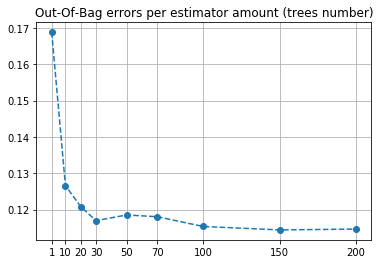

In [47]:
plt.title("Out-Of-Bag errors per estimator amount (trees number)")
plt.errorbar(n_trees,oob_errors, fmt='--o');
plt.xticks(n_trees)
plt.grid()

### Random Forest SkLearn class

In [50]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
# oob error not working, need to perform evaluation on test split
rfr.fit(trainVal_data, trainVal_values.ravel())
np.flip(np.argsort(rfr.feature_importances_))

array([ 44,  43,  40,  41,  92,  38,  68,  71,  34,  46,  66,  72,  49,
        27,  98,  36,  45,  76,  86,  95,  74,  75,  14,  24,  22,   3,
        25,  99,  77,  21,  94,   8,  96,  18,   4,  97,  26,  89,   6,
        78,  35,  61,  23,   0,  33,   2,  90,  69,  88,  17, 100,  39,
        50,  79,  16,  82,   5,  60,  28,  54,  37,  67,   1,  55,  47,
        87,  48,  64,   7,   9,  65,  52,  15,  62,  13,  93,  30,  32,
        31,  12,  51,  73,  91,  29,  80,  53,  20,  19,  59,  81,  56,
        85,  63,  83,  84,  10,  58,  42,  57, 101,  11,  70])

In [51]:
pred = rfr.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.06920646091022262
Root Mean Square Error: 0.15735803041289909
R^2 score: 0.4723830943764865


# Predictors - Models definition

## 1. Regularised Least Squares
   

In [54]:
class tikhonov_leastSquares:
    def __init__(self, weights = None):
        self.weights = weights
        
    def fit(self, X, y, _lambda):
        inv = np.linalg.inv(np.matmul(X.T, X) + _lambda*np.eye(X.shape[1]))
        self.weights = np.matmul(inv, np.matmul(X.T, y))
        return self
    
    def predict(self, X):
        if self.weights is None:
            raise Exception("weights not initialised! need to first fit the model")
        return np.matmul(X, self.weights)

In [55]:
k = 5
params_dict = {"_lambda":[1,1.3,1.5,1.7,2]}

tls = tikhonov_leastSquares()

win_regulariser = kFold_crossValidation_selectionGrid(k, params_dict, trainVal_data, trainVal_values, tls)[0]
print("Best regulariser: {}".format(win_regulariser))
tls.fit(trainVal_data, trainVal_values, win_regulariser)
pred = tls.predict(test_data)

rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Best regulariser: 2
Residual variance: 0.023245735124879163
Root Mean Square Error: 0.15316674001627847
R^2 score: 0.5001153300393807


## 2. Random Forest

In [56]:
rf = NumericalRandomForest_regressor(100)
rf.fit(trainVal_data, trainVal_values, depth=100, minElems_perLeaf=10);

pred = rf.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.06241032752976231
Root Mean Square Error: 0.16051688268735884
R^2 score: 0.4509873967695254


In [57]:
rf.oob_error

0.11292996277685952

In [58]:
rf.sort_featureImportances()

[(44, 0.5409551167031318),
 (46, 0.5106227836627024),
 (49, 0.4747469666436215),
 (40, 0.4581330321743458),
 (41, 0.4466276504519485),
 (63, 0.3615594538354053),
 (0, 0.3364830988179508),
 (69, 0.3200312839776561),
 (28, 0.304014717017596),
 (99, 0.2984591718605974),
 (84, 0.2974844895358142),
 (57, 0.28598351752049617),
 (72, 0.2859085427736752),
 (50, 0.28450464251214413),
 (9, 0.2779654488909611),
 (27, 0.27219752796854746),
 (39, 0.27164720896279015),
 (7, 0.26066114512575256),
 (21, 0.2603829906649481),
 (19, 0.25632564484066644),
 (82, 0.25605958397765893),
 (35, 0.25329321459372406),
 (75, 0.2532477686174295),
 (12, 0.2499524414943965),
 (42, 0.24798604476978348),
 (88, 0.2462894352489414),
 (31, 0.2400824475244392),
 (1, 0.2380064788994282),
 (85, 0.23002340833921336),
 (23, 0.22792630980453482),
 (74, 0.22789575375142984),
 (61, 0.22465596391104106),
 (34, 0.22452298578853205),
 (38, 0.22147113564560772),
 (2, 0.22044031029606026),
 (52, 0.2204088914538338),
 (76, 0.2193085977

## 3. SVM - Not Working (use the sklearn model)

In [59]:
class linear_SupportVector_regression:
    def __init__(self, weight=None, alpha=None, bias=None):
        self.x = alpha
        self.w = weight
        self.bias = bias
        self.Nabla = None
                
    def SMO2_ab(self, n, H, f, a, LB, UB, maxiter, eps, alpha_s):
        """
        % min_{x} .5 x H x + f' x 
        %         LB <= x <= UB
        %         a' x = b
        % n         grandezza problema length(x)
        % maxiter   max num it
        % eps       precisione
        % alpha_s   punto di inizio valido per x
        % Nabla     ....
        % err       flag di ok
        % x         valore della soluzione ottima
        % bias      ....
        """
        self.x = alpha_s
        self.Nabla = f
        for i in range(n):
            if (self.x[i] != 0.0):
                for j in range(n):
                    self.Nabla[j] += H[j,i] * self.x[i]
        iter_ = 0
        while True:
            minF_up = float("inf");
            maxF_low = float("-inf");
            for i in range(n): 
                F_i = self.Nabla[i]/a[i]
                if (LB[i] < self.x[i]) and (self.x[i] < UB[i]) :
                    if (minF_up > F_i):
                        minF_up = F_i
                        u = i
                    if (maxF_low < F_i):
                        maxF_low = F_i
                        v = i
                elif (((a[i] > 0) and (self.x[i] == LB[i])) or ((a[i] < 0) and (self.x[i] == UB[i]))) : 
                    if (minF_up > F_i):
                        minF_up = F_i
                        u = i
                elif (((a[i] > 0) and (self.x[i] == UB[i])) or ((a[i] < 0) and (self.x[i] == LB[i]))) : 
                    if (maxF_low < F_i):
                        maxF_low = F_i
                        v = i
            if ((maxF_low - minF_up) <= eps):
                err = 0.0
                break

            iter_ += 1
            if (iter_ >= maxiter):
                err = 1.0
                break

            if (a[u] > 0):
                tau_lb = (LB[u]-self.x[u])*a[u] 
                tau_ub = (UB[u]-self.x[u])*a[u] 
            else:
                tau_ub = (LB[u]-self.x[u])*a[u] 
                tau_lb = (UB[u]-self.x[u])*a[u]

            if (a[v] > 0):
                tau_lb = max(tau_lb,(self.x[v]-UB[v])*a[v]) 
                tau_ub = min(tau_ub,(self.x[v]-LB[v])*a[v]) 
            else:
                tau_lb = max(tau_lb,(self.x[v]-LB[v])*a[v]) 
                tau_ub = min(tau_ub,(self.x[v]-UB[v])*a[v])

            tau = (self.Nabla[v]/a[v]-self.Nabla[u]/a[u])/(H[u,u]/(a[u]*a[u])
                                                           +H[v,v]/(a[v]*a[v])
                                                           -2*H[v,u]/(a[u]*a[v]))
            tau = min(max(tau,tau_lb),tau_ub)
            self.x[u] += tau/a[u]
            self.x[v] -= tau/a[v]

            for i in range(n):
                self.Nabla[i] += H[u,i]*tau/a[u] - H[v,i]*tau/a[v]

        tsv = 0
        self.bias = 0.0

        for k in range(n):
            if ((self.x[k] > LB[k]) and (self.x[k] < UB[k])):
                self.bias -= self.Nabla[k]/a[k]
                tsv += 1

        if (tsv > 0):
            self.bias /= tsv
        else:    
            self.bias = -(maxF_low + minF_up)/2.0

        return err
    
    def fit(self, X, y, C):
        n = X.shape[0]
        cov = np.matmul(X, X.T)
        Q = np.matmul(np.matmul(np.diag(y.flatten()), cov),
                      np.diag(y.flatten()))
        
        if self.SMO2_ab(n,Q,-np.ones(n),y.flatten(),
                   np.zeros(n),C*np.ones(n),10000000,.0001,np.zeros(n)):
            print("Problem in SMO")
            
        self.w = np.matmul(np.matmul(X.T, np.diag(y.flatten())),
                           self.x)
        
        return self
    
    def predict(self, X):
        return np.matmul(X, self.w) + self.bias

In [176]:
k = 5
params_dict = {"C":[0.00001,0.0001,0.001,0.01,0.1]}

lsvr = linear_SupportVector_regression()

win_regulariser = kFold_crossValidation_selectionGrid(k, params_dict, trainVal_data, trainVal_values, lsvr)[0]
print("Best regulariser: {}".format(win_regulariser))
lsvr.fit(trainVal_data, trainVal_values, C=win_regulariser)

pred = lsvr.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))
print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Best regulariser: 1e-05
Residual variance: 0.04693092612286072
Root Mean Square Error: 6.306434099679313
R^2 score: -846.4393069706127


In [177]:
np.where(lsvr.x)

(array([  67,   70,   96,  109,  111,  239,  243,  266,  302,  385,  422,
         430,  517,  569,  605,  622,  643,  663,  682,  710,  741,  858,
         875,  987, 1031, 1032, 1064, 1075, 1192, 1209, 1291, 1428]),)

In [178]:
from sklearn.svm import SVR
svr = SVR(kernel="linear", tol=.0001, C=1)
svr.fit(trainVal_data, trainVal_values.flatten());

In [182]:
np.where(svr.dual_coef_)[1]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [183]:
pred = svr.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))

print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Residual variance: 0.06818948458048102
Root Mean Square Error: 0.1523876178641958
R^2 score: 0.5051879802358223


# Recursive Features Elimination
<img src="img/Algo1.png">

In [66]:
nrf = NumericalRandomForest_regressor(100)
nrf.fit(trainVal_data, trainVal_values, depth=200, minElems_perLeaf=5, verbose=False);

In [67]:
print("Features sorted by their score:\n")
nrf.sort_featureImportances()

Features sorted by their score:



[(43, 0.8085277621003111),
 (3, 0.7257305716768896),
 (2, 0.7111636245028883),
 (34, 0.6786337360776397),
 (38, 0.588333438771571),
 (45, 0.5765425303993233),
 (40, 0.5679268393705657),
 (44, 0.5651015774589389),
 (27, 0.5570682535112143),
 (20, 0.5366061625860112),
 (5, 0.5361645128118969),
 (67, 0.5267977113885269),
 (62, 0.5262379951055777),
 (74, 0.5234123184625811),
 (8, 0.5146736610453327),
 (0, 0.5051665726317632),
 (10, 0.4940701664628621),
 (28, 0.48858304089830934),
 (30, 0.4861495630479451),
 (81, 0.4810711176036725),
 (46, 0.4791968905019473),
 (79, 0.45872596981685415),
 (24, 0.4419848138800054),
 (9, 0.44156890386361003),
 (66, 0.4336358959768635),
 (99, 0.42325570040155674),
 (55, 0.4204678602368338),
 (13, 0.4182713371948919),
 (33, 0.41222747513267183),
 (36, 0.41064761313319614),
 (49, 0.40768054990710073),
 (50, 0.4026471234174672),
 (69, 0.4025275285987062),
 (80, 0.399219387039081),
 (75, 0.39495651300639517),
 (26, 0.3904189800947401),
 (68, 0.3869873769019828),
 

In [68]:
print("Features sorted by their score:\n")
nrf.sort_featureImportances(columns=pred_features.columns)

Features sorted by their score:



[('PctFam2Par', 0.8085),
 ('racePctWhite', 0.7257),
 ('racepctblack', 0.7112),
 ('PctEmplManu', 0.6786),
 ('MalePctDivorce', 0.5883),
 ('PctYoungKids2Par', 0.5765),
 ('FemalePctDiv', 0.5679),
 ('PctKids2Par', 0.5651),
 ('NumUnderPov', 0.5571),
 ('perCapInc', 0.5366),
 ('racePctHisp', 0.5362),
 ('PctPersOwnOccup', 0.5268),
 ('PctLargHouseFam', 0.5262),
 ('PctVacantBoarded', 0.5234),
 ('agePct16t24', 0.5147),
 ('population', 0.5052),
 ('numbUrban', 0.4941),
 ('PctPopUnderPov', 0.4886),
 ('PctNotHSGrad', 0.4861),
 ('OwnOccHiQuart', 0.4811),
 ('PctTeen2Par', 0.4792),
 ('OwnOccLowQuart', 0.4587),
 ('AsianPerCap', 0.442),
 ('agePct65up', 0.4416),
 ('PersPerRentOccHous', 0.4336),
 ('PopDens', 0.4233),
 ('PctImmigRec10', 0.4205),
 ('pctWWage', 0.4183),
 ('PctEmploy', 0.4122),
 ('PctOccupManu', 0.4106),
 ('NumKidsBornNeverMar', 0.4077),
 ('PctKidsBornNeverMar', 0.4026),
 ('PctHousLess3BR', 0.4025),
 ('OwnOccMedVal', 0.3992),
 ('PctVacMore6Mos', 0.395),
 ('HispPerCap', 0.3904),
 ('PctPersDenseHo

In [69]:
def rfe(estimator, parameters_dict, data, vals, n_features=None, verbose=False):
    _,d = data.shape
    nf = n_features if n_features else int(d/2)
    train_feat = list(range(d))    
    rmse = []
    r2 = []

    tr_data, ts_data, tr_vals, ts_vals = trainTest_split(in_matrix=data, out_vect=vals, train_amount=0.7)
    
    while d > nf:
        if verbose:
            update = round((data.shape[1]-d)*100/(data.shape[1]-nf), 2) # just print completion rate
            print("\t["+'#'*(int(update/5))+' '*(int((100-update)/5))+"] {}%".format(update))
            
        estimator.fit(X=tr_data[:,train_feat], y=tr_vals, **parameters_dict)
        pred = estimator.predict(ts_data)
        rem = Regression_evaluationMetric(ts_vals, pred)
        rmse.append(rem.rootMeanSquareError())
        r2.append(rem.rSquared())
            
        rank = estimator.sort_featureImportances()
        toDiscard_idx = rank[-1][0]
        train_feat.remove(train_feat[toDiscard_idx])

        d -= 1
    
    return (rmse, r2, train_feat)

In [70]:
p_dict = {"depth":300, "minElems_perLeaf":5, "post_pruning":True, "verbose":False}
rootMSE, r2, surv_feature = rfe(NumericalRandomForest_regressor(100),
                                p_dict, trainVal_data, trainVal_values, verbose=True)

	[                    ] 0.0%
	[                   ] 1.96%
	[                   ] 3.92%
	[#                  ] 5.88%
	[#                  ] 7.84%
	[#                  ] 9.8%
	[##                 ] 11.76%
	[##                 ] 13.73%
	[###                ] 15.69%
	[###                ] 17.65%
	[###                ] 19.61%
	[####               ] 21.57%
	[####               ] 23.53%
	[#####              ] 25.49%
	[#####              ] 27.45%
	[#####              ] 29.41%
	[######             ] 31.37%
	[######             ] 33.33%
	[#######            ] 35.29%
	[#######            ] 37.25%
	[#######            ] 39.22%
	[########           ] 41.18%
	[########           ] 43.14%
	[#########          ] 45.1%
	[#########          ] 47.06%
	[#########          ] 49.02%
	[##########         ] 50.98%
	[##########         ] 52.94%
	[##########         ] 54.9%
	[###########        ] 56.86%
	[###########        ] 58.82%
	[############       ] 60.78%
	[############       ] 62.75%
	[############     

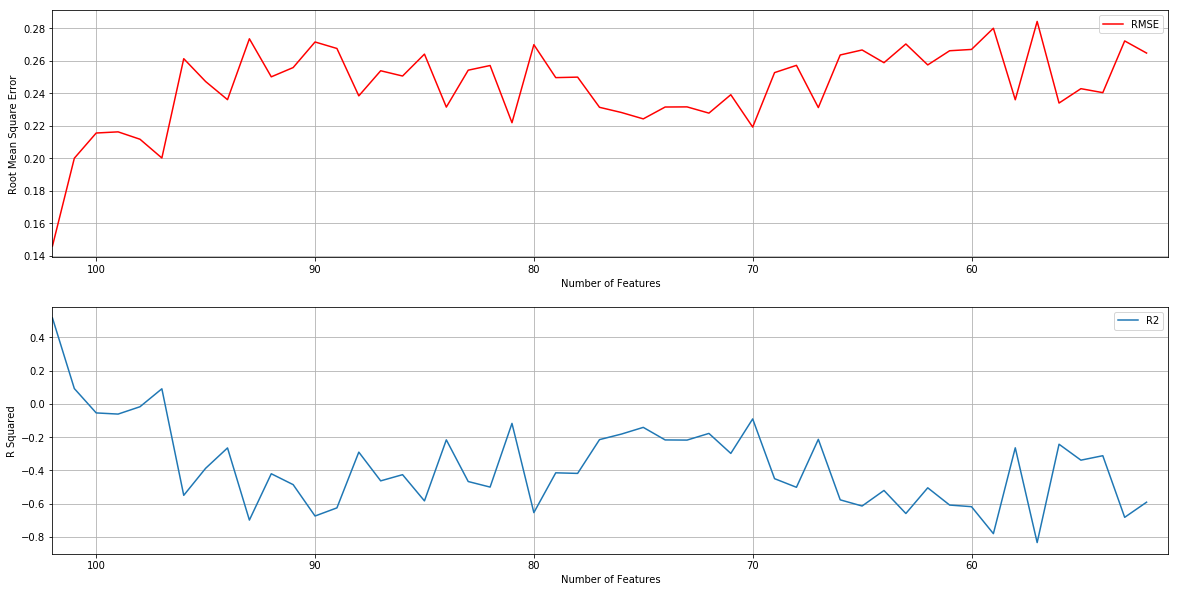

In [82]:
plt.figure(figsize=(20,10))
x = range(trainVal_data.shape[1],len(surv_feature),-1)

plt.subplot(211)
plt.plot(x, rootMSE,"r", label="RMSE")
plt.xlim(trainVal_data.shape[1], len(surv_feature))
plt.xlabel("Number of Features")
plt.ylabel("Root Mean Square Error")
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(x, r2, label="R2")
plt.xlim(trainVal_data.shape[1], len(surv_feature))
plt.xlabel("Number of Features")
plt.ylabel("R Squared")
plt.legend()
plt.grid()

In [84]:
pred_features.columns[surv_feature]

Index(['population', 'householdsize', 'racePctWhite', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc', 'OtherPerCap',
       'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctOccupManu',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'NumKidsBornNeverMar',
       'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRec5', 'PctImmigRec8',
       'PctLargHouseFam', 'PersPerOccupHous', 'PersPerRentOccHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR',
       'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'PctHousNoPhone',
       'OwnOccLowQuart', 'RentLowQ', 'RentHighQ', 'RentQrange',
       'MedRentPctHousInc', 'PctSameHouse85', 'PctSameState85', 'PopDens'],
      dtype='object')

# Apply non linearity to the obtained results

In [153]:
class kernel:        
    def gaussian(X, y=None, param=None):
        if param is None:
            param = 1/X.shape[1]
            
        if y is None:
            Q = np.exp(-param*np.square(pairwise_distances(X)))
        else:
            Q = np.exp(-param*np.square(pairwise_distances(X, y)))
        return Q

In [154]:
class kernelTikhonov_leastSquares:
    def __init__(self, kernel_func, alphas=None):
        self.kernel_func = kernel_func
        self.alphas = alphas
        self.train_set = None
        
    def fit(self, X, y, _lambda, k_parameter):
        self.train_set = X
        
        Q = self.kernel_func(X, param=k_parameter)
        inv = np.linalg.inv(Q + _lambda*np.eye(X.shape[0]))
        self.alphas = np.matmul(inv, y)
        
        return self
    
    def predict(self, X):
        if self.alphas is None:
            raise Exception("weights not initialised! need to first fit the model")
        
        return np.matmul(self.kernel_func(X, self.train_set), self.alphas)

In [185]:
k = 5
params_dict = {"_lambda":[0.5,1,1.3,1.5,1.7,2], "k_parameter":[0.0001,0.001, 0.01, 0.1, 1]}

ktls = kernelTikhonov_leastSquares(kernel_func=kernel.gaussian)

win_parameters = kFold_crossValidation_selectionGrid(k, params_dict, trainVal_data, trainVal_values, ktls)
print("Best regulariser: {}".format(win_parameters))
ktls.fit(trainVal_data, trainVal_values, _lambda=win_parameters[0], k_parameter=win_parameters[1])

pred = ktls.predict(test_data)
rem = Regression_evaluationMetric(test_values, pred)

print("Residual variance: {}".format(np.var(test_values-pred)))
print("Root Mean Square Error: {}".format(rem.rootMeanSquareError()))
print("R^2 score: {}".format(rem.rSquared()))

Best regulariser: (0.5, 0.01)
Residual variance: 0.023636065046686965
Root Mean Square Error: 0.158690316182208
R^2 score: 0.4634110421672054


In [186]:
pairwise_distances(trainVal_data)

array([[0.        , 3.0022884 , 5.05992712, ..., 2.71305652, 5.01363312,
        4.6612117 ],
       [3.0022884 , 0.        , 4.14352286, ..., 2.49270497, 4.6613858 ,
        3.45938209],
       [5.05992712, 4.14352286, 0.        , ..., 4.16625596, 3.90507531,
        3.68669142],
       ...,
       [2.71305652, 2.49270497, 4.16625596, ..., 0.        , 3.97451522,
        3.03762096],
       [5.01363312, 4.6613858 , 3.90507531, ..., 3.97451522, 0.        ,
        3.89302381],
       [4.6612117 , 3.45938209, 3.68669142, ..., 3.03762096, 3.89302381,
        0.        ]])

In [189]:
np.matmul(trainVal_data.T,trainVal_data)

array([[1453.15134774,  578.17311732, 1184.19627219, ..., 1287.97698283,
        1309.31618173, 1409.63358251],
       [ 578.17311732,  278.96050922,  465.9458214 , ...,  512.73910513,
         518.05468894,  558.00280042],
       [1184.19627219,  465.9458214 , 1088.56934908, ..., 1052.02716115,
        1076.00150813, 1158.85865989],
       ...,
       [1287.97698283,  512.73910513, 1052.02716115, ..., 1165.86172505,
        1180.19547073, 1252.38413572],
       [1309.31618173,  518.05468894, 1076.00150813, ..., 1180.19547073,
        1224.60622291, 1273.1759203 ],
       [1409.63358251,  558.00280042, 1158.85865989, ..., 1252.38413572,
        1273.1759203 , 1387.7480198 ]])